# Import library

In [1]:
# Data Loading
import xarray as xr  

# Data Processing
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.basemap import Basemap

# Data Load

In [2]:
### Data Source
# data source : https://psl.noaa.gov/data/gridded/data.cmap.html
# https://psl.noaa.gov/cgi-bin/db_search/DBSearch.pl?Dataset=CDC+Derived+NCEP+Reanalysis+Products+Pressure+Level&group=0&submit=Search

path_prec = './precip.mon.ltm.nc'
path_uwnd = './uwnd.mon.1981-2010.ltm.nc'
path_vwnd = './vwnd.mon.1981-2010.ltm.nc'

prec_nc = xr.open_dataset(path_prec)
uwnd_nc = xr.open_dataset(path_uwnd)
vwnd_nc = xr.open_dataset(path_vwnd)

print(prec_nc) # print dataset infomation 
print(uwnd_nc) # print dataset infomation 
print(vwnd_nc) # print dataset infomation 

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 88.75 86.25 83.75 ... -83.75 -86.25 -88.75
  * lon                 (lon) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    title:                          CPC Merged Analysis of Precipitation (exc...
    platform:                       Analyses
    source:                         ftp ftp.cpc.ncep.noaa.gov precip/cmap/mon...
    dataset_title:                  CPC Merged Analysis of Precipitation
    documentation:                  https://www.esrl.noaa.gov/psd/data/gridde...
    date_modified:              

/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/python/2.7/envs/p3.6_cpu/l

# Data Processing

In [3]:
# select variable
prec = prec_nc.data_vars['precip']
uwnd = uwnd_nc.data_vars['uwnd']
vwnd = vwnd_nc.data_vars['vwnd']

print(prec.shape)
print(uwnd.shape)
print(vwnd.shape)

(12, 72, 144)
(12, 17, 73, 144)
(12, 17, 73, 144)


In [4]:
# select level (850mb)
uwnd = uwnd.sel(level=850)
vwnd = vwnd.sel(level=850)

print(uwnd.shape)
print(vwnd.shape)

(12, 73, 144)
(12, 73, 144)


In [5]:
# select domain
prec = prec.sel(lon=slice(225,275), lat=slice(55,20))
uwnd = uwnd.sel(lon=slice(225,275), lat=slice(55,20)) 
vwnd = vwnd.sel(lon=slice(225,275), lat=slice(55,20))

print(prec.shape)
print(uwnd.shape)
print(vwnd.shape)

(12, 14, 20)
(12, 15, 21)
(12, 15, 21)


# Visualization

In [6]:
def plot_NAM(ax, month):
    if month == 4: 
        time_sel, month_title = '0001-04', 'April'
    if month == 5: 
        time_sel, month_title = '0001-05', 'May'
    if month == 6: 
        time_sel, month_title = '0001-06', 'June'
    if month == 7: 
        time_sel, month_title = '0001-07', 'July'
    if month == 8: 
        time_sel, month_title = '0001-08', 'August'
    if month == 9: 
        time_sel, month_title = '0001-09', 'September'        
        
    m = Basemap(
        lon_0=0, lat_0=0, # center of mat domain
        llcrnrlon=225., llcrnrlat=20., urcrnrlon=275., urcrnrlat=55., # projection region
        resolution='l', # boundary resolution (c, l, i, h, f)
        ax=ax
    )
    
    coord = np.meshgrid(prec.lon, prec.lat)
    
    m.drawcoastlines(linewidth=1., color='lightblue') # draw coastline
    m.drawcountries(linewidth=1., color='lightblue') # draw country line
    m.drawstates(linewidth=1., color='lightblue') # draw state line
    m.drawparallels(np.linspace(20,55,8), labels=[1,0,0,0], linewidth=0., fontsize=10) # draw horizontal grid line
    m.drawmeridians(np.linspace(225,275,5), labels=[0,0,0,1], linewidth=0., fontsize=10) # draw vertical grid line
    
    #customized cmap
    mycmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red', 'darkred', 'black'])
    plot_contour = m.contourf(coord[0], coord[1], prec.sel(time=time_sel)[0],
               cmap=mycmap,
               levels=[1.5, 2.5, 3.5, 5., 10.]
              )
    
    cbar = m.colorbar(plot_contour, ax=ax,
                 location='right',
                 pad='1%', size='3%') # colorbar
    cbar.ax.tick_params(labelsize=10)
    
    coord = np.meshgrid(uwnd.lon, uwnd.lat)
    
    m.quiver(coord[0], coord[1], uwnd.sel(time=time_sel)[0], vwnd.sel(time=time_sel)[0],
             width=0.003, scale=150, color='k')
    
    ax.set_title(month_title)

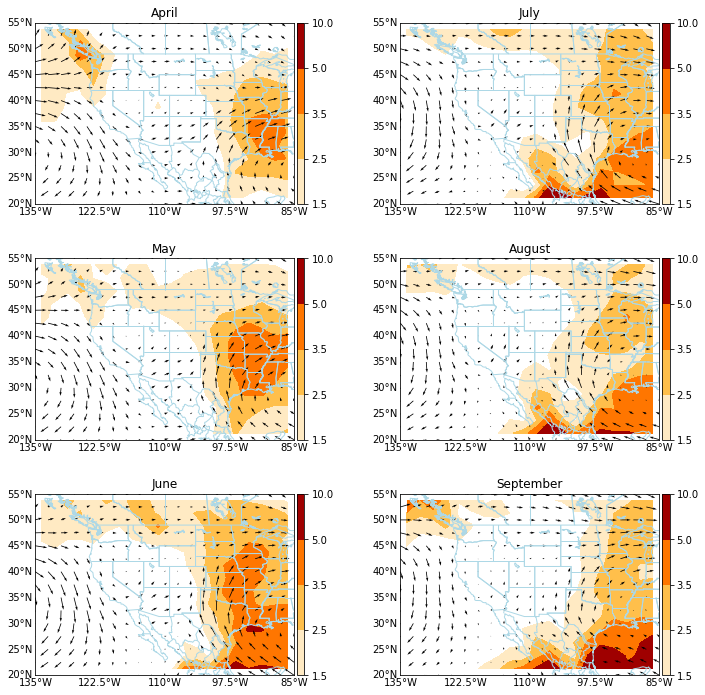

In [7]:
# set multiple figures 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plot_NAM(ax[0][0], 4)   # April
plot_NAM(ax[1][0], 5)   # May
plot_NAM(ax[2][0], 6)   # June
plot_NAM(ax[0][1], 7)   # July
plot_NAM(ax[1][1], 8)   # August
plot_NAM(ax[2][1], 9)   # September